### Importing necessary modules

In [1]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report

In [2]:
#Reading the data
df=pd.read_csv('pcadata.csv')

In [3]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [4]:
#printing total number of missing values in each feature
print(df.isnull().sum())   

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


In [5]:
#preprocessing through imputation
df.fillna(df.mean(),axis=0,inplace=True)

C:\Users\Dell\AppData\Local\Temp/ipykernel_8616/92620703.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(),axis=0,inplace=True)


In [6]:
#  X and y values
X = df.drop('class',axis=1)
y = df['class']

In [7]:
X.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


In [8]:
y.head()

0    van
1    van
2    car
3    van
4    bus
Name: class, dtype: object

In [9]:
# PCA
clf = StandardScaler()
X = clf.fit_transform(X)
pca = PCA(n_components=18)
pca.fit_transform(X)

array([[ 3.26091510e-01, -2.18346747e-01,  1.00078951e+00, ...,
        -1.73404411e-01, -1.28870098e-02,  3.32163158e-02],
       [-1.60083178e+00, -4.19280434e-01, -3.71215917e-01, ...,
        -2.11629326e-02,  2.63171244e-02, -1.30729675e-02],
       [ 3.76278839e+00,  1.93899185e-01,  8.77458895e-02, ...,
         9.18684961e-02,  1.59423091e-01,  1.74068797e-02],
       ...,
       [-3.21908905e-01,  1.64904142e-01,  7.94768566e-01, ...,
         5.16315285e-02, -2.79351539e-02,  1.01360245e-02],
       [ 4.80455164e+00, -3.47810260e-03,  5.34133158e-01, ...,
         1.17355521e-02, -2.93081780e-02,  1.39105521e-03],
       [-3.30205409e+00, -1.00736479e+00, -3.56916028e-01, ...,
         1.35918071e-01,  7.25272116e-02, -5.14860163e-03]])

In [10]:
# Best features
clf = RandomForestClassifier()
clf.fit(X, y)
print(clf.feature_importances_)

[0.04038062 0.03116696 0.06509629 0.03240977 0.05895054 0.1371283
 0.0896964  0.070095   0.03047996 0.08527402 0.06568126 0.08422955
 0.0218658  0.06305031 0.02132583 0.02188961 0.03707413 0.04420566]


In [11]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
clf=SVC(kernel='linear')
clf.fit(X_train,y_train)
y_preds=clf.predict(X_test)


In [13]:
# Confusion matrix
print("\nConfusion matrix: \n",multilabel_confusion_matrix(y_test,y_preds))


Confusion matrix: 
 [[[132   2]
  [  2  33]]

 [[ 69   2]
  [  5  93]]

 [[130   3]
  [  0  36]]]


In [14]:
# Classification Report
print("\nClassification Report: \n",classification_report(y_test,y_preds))


Classification Report: 
               precision    recall  f1-score   support

         bus       0.94      0.94      0.94        35
         car       0.98      0.95      0.96        98
         van       0.92      1.00      0.96        36

    accuracy                           0.96       169
   macro avg       0.95      0.96      0.96       169
weighted avg       0.96      0.96      0.96       169



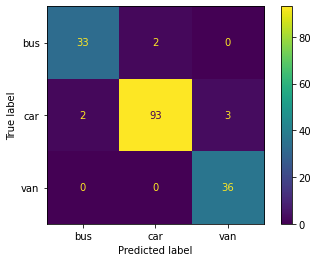

In [15]:
plot_confusion_matrix(clf, X_test, y_test)